In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
df = pd.read_csv('FAOSTAT_data_en_7-29-2025.csv')
df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,CISP,Country Investment Statistics Profile,646,Rwanda,61840,"Value US$, 2015 prices",22016,"Value Added (Agriculture, Forestry and Fishing)",2001,2001,million USD,1019.556096,X,Figure from international organizations,NaN
1,CISP,Country Investment Statistics Profile,646,Rwanda,61390,"Share of Total US$, 2015 prices",22016,"Value Added (Agriculture, Forestry and Fishing)",2001,2001,%,34.339111,X,Figure from international organizations,NaN
2,CISP,Country Investment Statistics Profile,646,Rwanda,6182,"Annual growth US$, 2015 prices",22016,"Value Added (Agriculture, Forestry and Fishing)",2001,2001,%,8.802817,X,Figure from international organizations,NaN
3,CISP,Country Investment Statistics Profile,646,Rwanda,61840,"Value US$, 2015 prices",22016,"Value Added (Agriculture, Forestry and Fishing)",2002,2002,million USD,1191.131879,X,Figure from international organizations,NaN
4,CISP,Country Investment Statistics Profile,646,Rwanda,61390,"Share of Total US$, 2015 prices",22016,"Value Added (Agriculture, Forestry and Fishing)",2002,2002,%,35.446203,X,Figure from international organizations,NaN


In [8]:
df_cleaned = df.drop(columns=['Domain Code', 'Area Code', 'Element Code', 'Item Code', 'Year Code'], errors='ignore')
df_cleaned = df_cleaned[df_cleaned['Area'] == 'Rwanda']
df_cleaned.isnull().sum()

Domain                0
Area Code (M49)       0
Area                  0
Element               0
Item                  0
Year                  0
Unit                 66
Value                 0
Flag                  0
Flag Description      0
Note                343
dtype: int64

       Area Code (M49)         Year        Value  Note
count            343.0   343.000000   343.000000   0.0
mean             646.0  2012.475219   153.309615   NaN
std                0.0     6.549305   497.313488   NaN
min              646.0  2001.000000    -3.047091   NaN
25%              646.0  2007.000000     2.599056   NaN
50%              646.0  2012.000000     6.548176   NaN
75%              646.0  2018.000000    31.445869   NaN
max              646.0  2024.000000  2845.336787   NaN


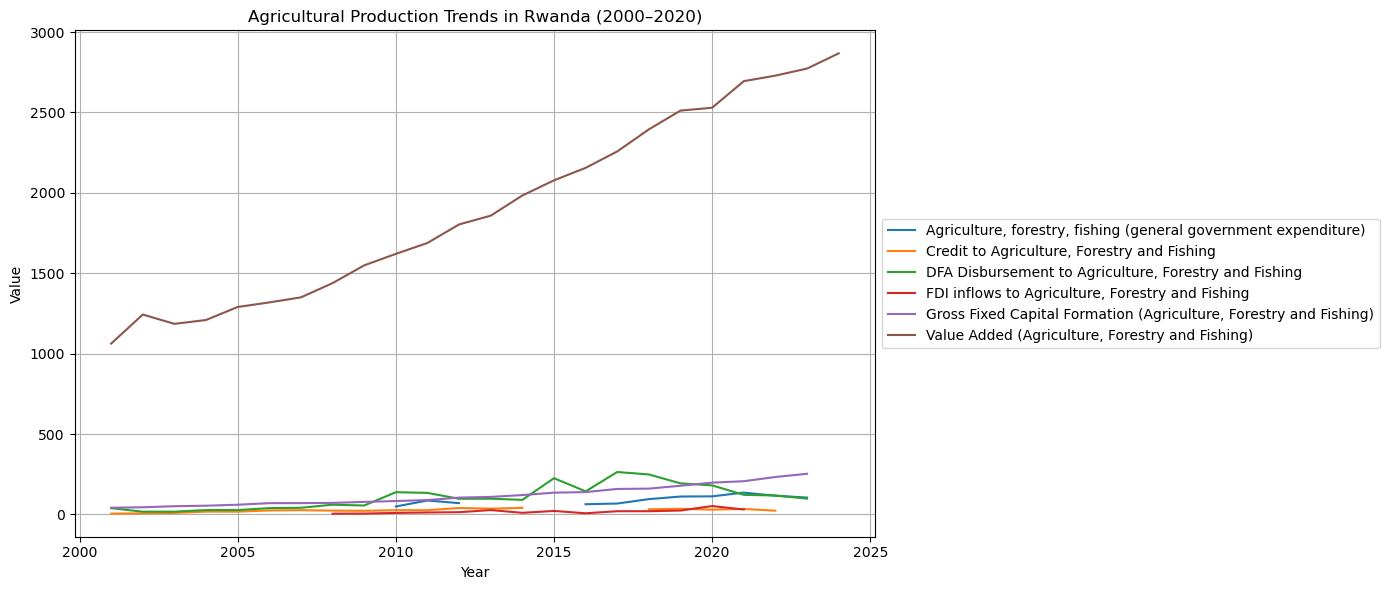

In [9]:
print(df_cleaned.describe())
pivot = df_cleaned.pivot_table(index='Year', columns='Item', values='Value', aggfunc='sum')
pivot.plot(figsize=(14, 6))
plt.title('Agricultural Production Trends in Rwanda (2000–2020)')
plt.ylabel('Value')
plt.xlabel('Year')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.show()

In [13]:
print(df['Item'].unique())


['Value Added (Agriculture, Forestry and Fishing)'
 'Gross Fixed Capital Formation (Agriculture, Forestry and Fishing)'
 'Agriculture, forestry, fishing (general government expenditure)'
 'Credit to Agriculture, Forestry and Fishing'
 'DFA Disbursement to Agriculture, Forestry and Fishing'
 'FDI inflows to Agriculture, Forestry and Fishing']


In [14]:
target_item = "Value Added (Agriculture, Forestry and Fishing)"
value_added_df = df[
    (df['Area'] == 'Rwanda') & 
    (df['Item'] == target_item)
][['Year', 'Value']].dropna()

print(value_added_df.head())

   Year        Value
0  2001  1019.556096
1  2001    34.339111
2  2001     8.802817
3  2002  1191.131879
4  2002    35.446203


In [15]:
X = value_added_df[['Year']]
y = value_added_df['Value']

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
value_added_df['Predicted'] = model.predict(X)


In [23]:
from sklearn.linear_model import LinearRegression

X = df_filtered[['Year']]
y = df_filtered['Value']

model = LinearRegression()
model.fit(X, y)

df_filtered['Predicted'] = model.predict(X)



In [24]:
from sklearn.metrics import r2_score, root_mean_squared_error

r2 = r2_score(y, df_filtered['Predicted'])
rmse = root_mean_squared_error(y, df_filtered['Predicted'])

print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")

R² Score: 0.041
RMSE: 915.903


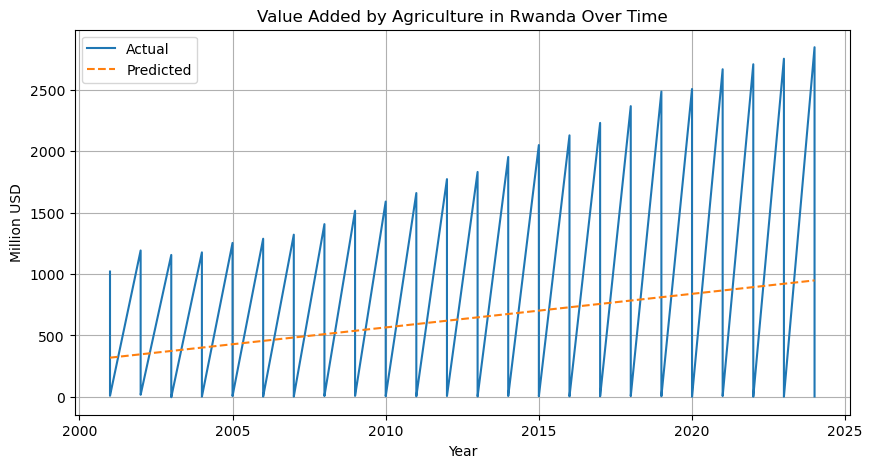

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(value_added_df['Year'], value_added_df['Value'], label='Actual')
plt.plot(value_added_df['Year'], value_added_df['Predicted'], label='Predicted', linestyle='--')
plt.xlabel("Year")
plt.ylabel("Million USD")
plt.title("Value Added by Agriculture in Rwanda Over Time")
plt.legend()
plt.grid(True)
plt.show()

In [26]:
value_added_df.to_csv("rwanda_agriculture_value_added.csv", index=False)
print("✅ Data exported to 'rwanda_agriculture_value_added.csv'")

✅ Data exported to 'rwanda_agriculture_value_added.csv'
